In [1]:
"""
This notebook aggregates all output from toboggan and catfish
for a specified input dataset, then creates runtime histograms
"""
import table_generator
import matplotlib.pyplot as plt
import numpy as np

    
show_flag = False

time_totals = []
time_totals_catfish_nontrivials = []
time_totals_catfish_tob_timeouts = []

froots = ['human', 'mouse', 'zebra']

for froot in ['human', 'mouse', 'zebra']:
    #froot = 'mouse'

    timeoutexceed = 800
    which_alg = "toboggan"

    inputfile = "all-" + froot + ".txt"

    # import table_generator

    # datadict, datamatrix, dict_cat_to_tob, dict_tob_to_cat = table_generator.make_tables(inputfile)
    datadict, datamatrix = table_generator.make_tables(inputfile)

    info_dict = table_generator.get_toboggan_timing_info(datadict, datamatrix)
    num_trivial = info_dict['num_trivial']
    num_timedout = info_dict['num_timedout']
    time_totals.append(info_dict['time_totals'])
    total_num = info_dict['total_num']
    nontrivials_dict = info_dict['nontrivials_dict']
    toboggan_completed = info_dict['toboggan_completed']
    toboggan_timeouts = info_dict['toboggan_timeouts']
    toboggan_num_paths_dict = info_dict['toboggan_num_paths_dict']

    table_generator.print_data_summary( froot, len(datadict), num_trivial )
    table_generator.print_alg_summary( which_alg, timeoutexceed, num_timedout, len(time_totals) )

    print(num_timedout + len(time_totals))

    catinputfile = 'catfish-' + froot + '-proper-output.txt'
    catfish_dict, catfish_matrix = table_generator.get_catfish_tables( '../catfish-comparison/', catinputfile)

    # interesect catfish keys with nontrivial keys
    nontrivial_catfish = catfish_dict.copy()
    for key in catfish_dict:
        if key not in toboggan_completed:
            nontrivial_catfish.pop(key, None)
    catfish_nontrivials_info_dict = table_generator.get_catfish_timing_info(nontrivial_catfish, catfish_matrix)
    time_totals_catfish_nontrivials.append(catfish_nontrivials_info_dict['time_totals'])

    catfish_on_tob_timeouts = {}
    for key, val in catfish_dict.items():
        if key in toboggan_timeouts:
            catfish_on_tob_timeouts[key] = val
    catfish_tob_timeout_info_dict = table_generator.get_catfish_timing_info(catfish_on_tob_timeouts, catfish_matrix)
    time_totals_catfish_tob_timeouts.append(catfish_tob_timeout_info_dict['time_totals'])

human has 
	total   instances:      1169083
	trivial instances:       639560
	nontriv instances:       529523

toboggan with 800s timeout has
	timeout instances:            0
	success instances:            1
1
mouse has 
	total   instances:      1316058
	trivial instances:       842873
	nontriv instances:       473185

toboggan with 800s timeout has
	timeout instances:            0
	success instances:            2
2
zebra has 
	total   instances:      1549373
	trivial instances:      1103493
	nontriv instances:       445880

toboggan with 800s timeout has
	timeout instances:            0
	success instances:            3
3


In [2]:
catfish_sum = 0
toboggan_sum = 0
toboggan_long_sum = 0
for j in [0,1,2]:
    print(sum(time_totals_catfish_nontrivials[j]))
    catfish_sum += sum(time_totals_catfish_nontrivials[j])
    toboggan_sum += sum(time_totals[j])
    long_times = [ x for x in time_totals[j] if x > 0.5]
    toboggan_long_sum += sum(long_times)
    print(len(long_times))
print("catfish total: {}".format(catfish_sum))
print("toboggan total: {}".format(toboggan_sum))
print("toboggan total over 2s: {}".format(toboggan_long_sum))
print("toboggan minus long {}".format(toboggan_sum - toboggan_long_sum))



1825.1296191215515
7269
1680.2260267734528
6570
1626.945827960968
939
catfish total: 5132.301473855972
toboggan total: 533579.4521188214
toboggan total over 2s: 528051.9334192248
toboggan minus long 5527.518699596636


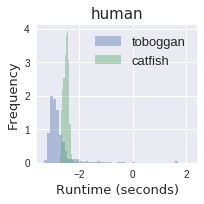

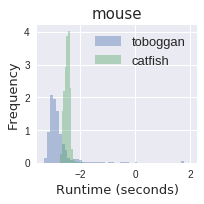

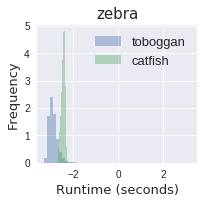

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

froots = ['human', 'mouse', 'zebra']
show_flag = True

hist_flag = True
kde_flag = False
norm_hist_flag=True

for j in [0,1,2]:

    froot = froots[j]

    plt.clf()
    plt.figure(figsize=(3,3))

    axis_font = {'fontname':'DejaVu Sans', 'size':'13'}
    title_font = {'fontname':'DejaVu Sans', 'size':'15'}
    xtick_font = {'fontname':'DejaVu Sans', 'size':'15'}
    ytick_font = {'fontname':'DejaVu Sans', 'size':'15'}

    data=np.log10(time_totals[j])
    sns.distplot(data, kde=kde_flag, hist=hist_flag, norm_hist=norm_hist_flag, label="toboggan")
    data=np.log10(time_totals_catfish_nontrivials[j])
    sns.distplot(data, kde=kde_flag, hist=hist_flag, norm_hist=norm_hist_flag, label="catfish")
    # data=np.log10(time_totals_catfish_tob_timeouts[j])
    # sns.distplot(data, kde=True, hist=False, label="TOs", ax=ax)

    plt.title(froots[j], **title_font)
    plt.legend(loc='upper right', fontsize=axis_font['size'])
    #plt.gca().set_xticklabels([10**x for x in range(-4, 4)])
    plt.xlabel("Runtime (seconds)", **axis_font)
    plt.ylabel("Frequency", **axis_font)

    fig = plt.gcf()
    fig.tight_layout()

    if show_flag == True:
        plt.show()
    else:
        plt.savefig( './figures/'+'runtime-kdensity-' + froot + '.pdf', format='pdf', dpi=300)
        plt.savefig( './figures/'+'runtime-kdensity-' + froot + '.png', format='png', dpi=300)
    plt.close()


In [4]:
# AGGREGATE ALL IN ONE

all_toboggan_times = []
all_catfish_times = []
for j in [0,1,2]:
    all_toboggan_times.extend(time_totals[j])
    all_catfish_times.extend(time_totals_catfish_nontrivials[j])

all_toboggan_times_small = [ x for x in all_toboggan_times if x <= 0.01 ]
all_toboggan_times_big = [ x for x in all_toboggan_times if x > 0.01 ]
all_catfish_times_small = [ x for x in all_catfish_times if x <= 0.01 ]
all_catfish_times_big = [ x for x in all_catfish_times if x > 0.01 ]

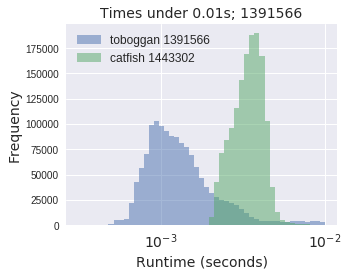

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

show_flag = True


plt.clf()
plt.figure(figsize=(5,4))

logbins = [ 10**x for x in np.linspace(-3.5, -2.0, num=50) ]
extratag = ''
log_scale_flag = False

if log_scale_flag:
    plt.gca().set_yticklabels([10**x for x in range(0, 6)], **ytick_font)
    plt.gca().set_yscale("log")    

n, bins, patchs = plt.hist(all_toboggan_times_small, bins=logbins, log=log_scale_flag, alpha=0.5, label='toboggan {}'.format(len(all_toboggan_times_small)))
n, bins, patchs = plt.hist(all_catfish_times_small, bins=logbins, log=log_scale_flag, alpha=0.5, label='catfish {}'.format(len(all_catfish_times_small)))

legend_font = {'fontname':'DejaVu Sans', 'size':'12'}
axis_font = {'fontname':'DejaVu Sans', 'size':'14'}
title_font = {'fontname':'DejaVu Sans', 'size':'14'}
xtick_font = {'fontname':'DejaVu Sans', 'size':'14'}
ytick_font = {'fontname':'DejaVu Sans', 'size':'14'}

# if froot == 'human':
plt.ylabel("Frequency", **axis_font)
plt.legend(loc='upper left', frameon=False, fontsize=legend_font['size'])
# else:
#     plt.gca().set_yticklabels([])

#plt.xlim([10**-4, 10**4])
#plt.ylim([10**0, 10**6])
plt.gca().set_xticklabels([10**x for x in range(-4, 3)], **xtick_font)
plt.gca().set_xscale("log")

plt.title('Times under 0.01s; {}'.format(len(all_toboggan_times_small)), **title_font)
plt.xlabel("Runtime (seconds)", **axis_font)
plt.ylabel("Frequency", **axis_font)

fig = plt.gcf()
fig.tight_layout()

if show_flag == True:
    plt.show()
else:
    plt.savefig( './figures/'+'runtime-new-small-all' + '.pdf', format='pdf', dpi=300)
    plt.savefig( './figures/'+'runtime-new-small_all' + '.png', format='png', dpi=300)
plt.close()

In [6]:

plt.clf()
plt.figure(figsize=(5,4))

logbins = [ 10**x for x in np.linspace(-2.0, 3.0, num=50) ]

n, bins, patchs = plt.hist(all_toboggan_times_big, bins=logbins, log=log_scale_flag, alpha=0.5, label='toboggan')
n, bins, patchs = plt.hist(all_catfish_times_big, bins=logbins, log=log_scale_flag, alpha=0.5, label='catfish')

plt.ylabel("Frequency", **axis_font)

plt.gca().set_xticklabels([10**x for x in range(-4, 3)], **xtick_font)
plt.gca().set_xscale("log")

plt.title('Times over 0.01s; {}'.format(len(all_toboggan_times_big)), **title_font)
plt.xlabel("Runtime (seconds)", **axis_font)
plt.ylabel("Frequency", **axis_font)

fig = plt.gcf()
fig.tight_layout()

if show_flag == True:
    plt.show()
else:
    plt.savefig( './figures/'+'runtime-new-big-all' + '.pdf', format='pdf', dpi=300)
    plt.savefig( './figures/'+'runtime-new-big-all' + '.png', format='png', dpi=300)
plt.close()